#### Testing classes for furry-couscous

In [1]:
from fcc_DRs import * # file with dimensionality reduction classes

Using TensorFlow backend.


In [2]:
# read a csv file into a counts_table object
# this one has cells already in the rows, but no cell ID labels
# it does have gene labels in the 0th row position
test1 = counts_table(datafile='inputs/Myeloid_with_IDs.csv', labels=[0,None], cells_axis=0)

In [3]:
# this is already feature-selected to 171 genes
test1.data.shape

(4423, 171)

In [4]:
# generate PCA object for arcsinh-transformed data with 100 components
%time test1_PCA = fcc_PCA(test1.arcsinh_norm(), n_components=100)

CPU times: user 2.47 s, sys: 145 ms, total: 2.61 s
Wall time: 2.38 s


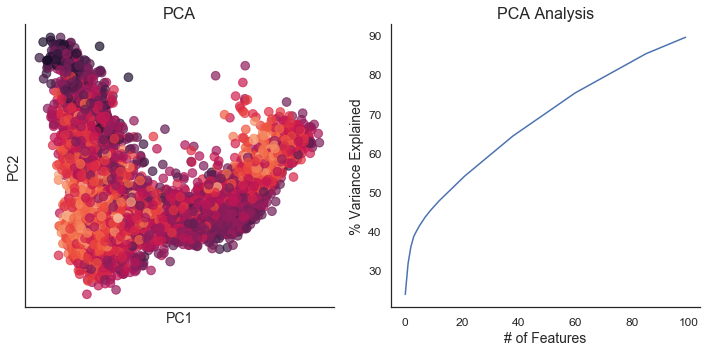

In [5]:
# look at the results
test1_PCA.plot()

In [6]:
# now we can perform a t-SNE on the arcsinh-transformed data...
%time test1_tSNE = fcc_tSNE(test1.arcsinh_norm(), perplexity=30)

CPU times: user 44.6 s, sys: 1.66 s, total: 46.3 s
Wall time: 46.6 s


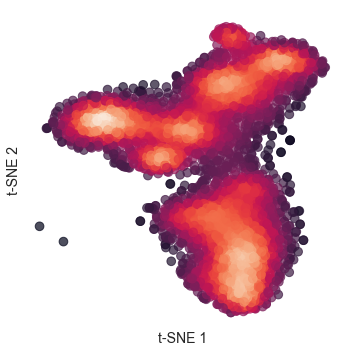

In [7]:
# ... and look at those results
test1_tSNE.plot()

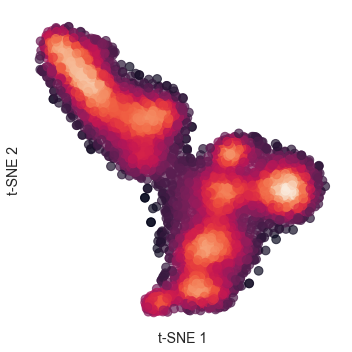

In [9]:
# we could also create a tSNE primed with our PCA results
test1_PCA_tSNE = fcc_tSNE(test1_PCA.results, perplexity=30)
test1_PCA_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12d59f240>)

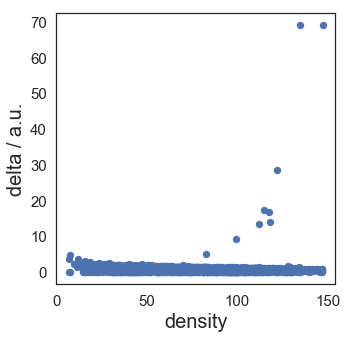

In [10]:
# density-peak clustering is built into the DR objects
# we can look at the decision graph and assign cluster centers 
test1_PCA_tSNE.clu.draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12d636f28>)

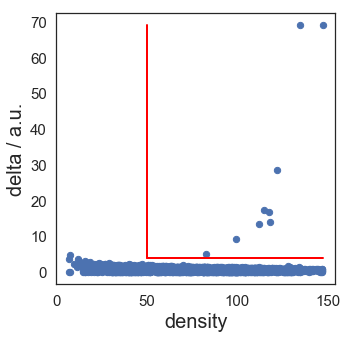

In [12]:
# now, if we assign cutoffs for density and delta, we can generate cluster membership for our tSNE
test1_PCA_tSNE.clu.assign(50, 4)
test1_PCA_tSNE.clu.draw_decision_graph(min_delta=test1_PCA_tSNE.clu.min_delta, min_density=test1_PCA_tSNE.clu.min_density)

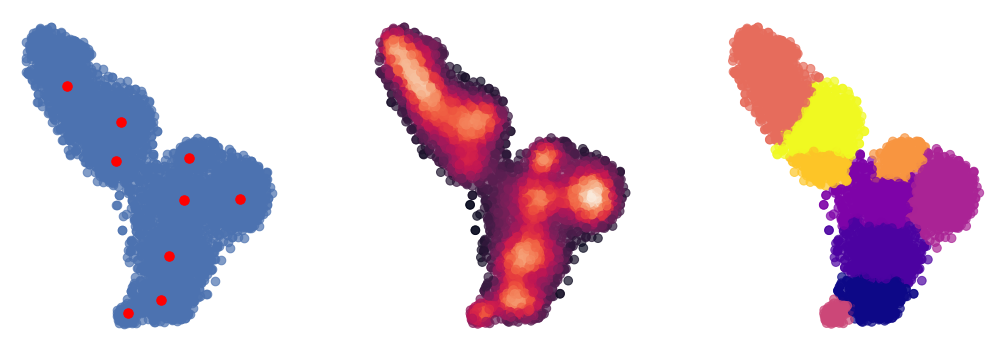

In [13]:
# finally, we can look at the clusters in our tSNE
test1_PCA_tSNE.plot_clusters()

In [14]:
# this object has cluster membership for each cell built in now:
test1_PCA_tSNE.clu.membership

array([2, 2, 8, ..., 3, 3, 3], dtype=int32)

Clustering not yet determined.
Assign clusters with self.clu.assign()
 'Cluster' object has no attribute 'clusters'


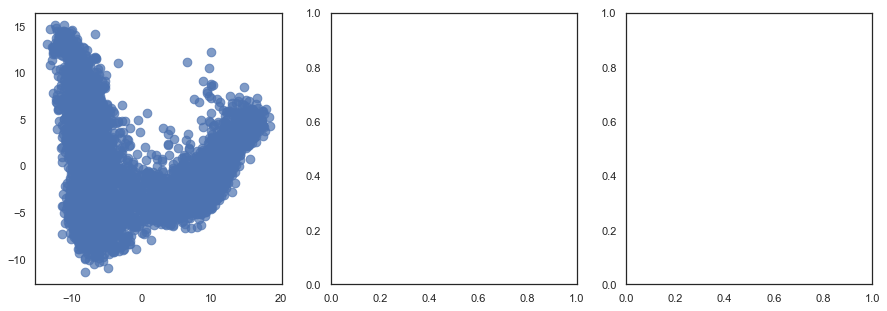

In [15]:
# if you try to plot clusters without assigning cutoffs, it won't work
test1_PCA.plot_clusters()